<h1>chapter14 Data Analysis Examples<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1、来自Bitly的USA.gov数据" data-toc-modified-id="1、来自Bitly的USA.gov数据-1">1、来自Bitly的USA.gov数据</a></span><ul class="toc-item"><li><span><a href="#1.1-用纯Python代码对时区进行计数" data-toc-modified-id="1.1-用纯Python代码对时区进行计数-1.1">1.1 用纯Python代码对时区进行计数</a></span></li><li><span><a href="#1.2-用pandas对时区进行计数" data-toc-modified-id="1.2-用pandas对时区进行计数-1.2">1.2 用pandas对时区进行计数</a></span></li></ul></li><li><span><a href="#2-Movielens-影评数据" data-toc-modified-id="2-Movielens-影评数据-2">2 Movielens 影评数据</a></span><ul class="toc-item"><li><span><a href="#2.1--计算评分分歧" data-toc-modified-id="2.1--计算评分分歧-2.1">2.1  计算评分分歧</a></span></li></ul></li><li><span><a href="#3-1880-2010年间全美婴儿姓名" data-toc-modified-id="3-1880-2010年间全美婴儿姓名-3">3 1880-2010年间全美婴儿姓名</a></span><ul class="toc-item"><li><span><a href="#3.1-分析命名趋势" data-toc-modified-id="3.1-分析命名趋势-3.1">3.1 分析命名趋势</a></span></li><li><span><a href="#3.2-评估命名多样性的增长" data-toc-modified-id="3.2-评估命名多样性的增长-3.2">3.2 评估命名多样性的增长</a></span></li><li><span><a href="#3.3-最后一个字母的变动" data-toc-modified-id="3.3-最后一个字母的变动-3.3">3.3 最后一个字母的变动</a></span></li><li><span><a href="#3.4-变成女孩名字的男孩名字（以及相反的情况）" data-toc-modified-id="3.4-变成女孩名字的男孩名字（以及相反的情况）-3.4">3.4 变成女孩名字的男孩名字（以及相反的情况）</a></span></li></ul></li><li><span><a href="#4-USDA食品数据库" data-toc-modified-id="4-USDA食品数据库-4">4 USDA食品数据库</a></span></li><li><span><a href="#5-2012联邦选举委员会数据库" data-toc-modified-id="5-2012联邦选举委员会数据库-5">5 2012联邦选举委员会数据库</a></span><ul class="toc-item"><li><span><a href="#5.1-根据职业和雇主统计赞助信息" data-toc-modified-id="5.1-根据职业和雇主统计赞助信息-5.1">5.1 根据职业和雇主统计赞助信息</a></span></li><li><span><a href="#5.2-对出资额分组" data-toc-modified-id="5.2-对出资额分组-5.2">5.2 对出资额分组</a></span></li><li><span><a href="#5.3-根据州统计赞助信息" data-toc-modified-id="5.3-根据州统计赞助信息-5.3">5.3 根据州统计赞助信息</a></span></li></ul></li></ul></div>

In [1]:
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# np 和 pandas的设定
np.random.seed(123)
np.set_printoptions(precision=4)
pd.set_option('display.float_format', lambda x: '%.4f' % x) # 不使用科学计数法
pd.set_option('display.max_columns', None) # 显示所有列
pd.set_option('display.max_rows', 20) # 设定df全部显示的行数

import warnings
warnings.filterwarnings('ignore') # 忽略警告提示

# 一个cell做多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 6)

# plt.style.use('ggplot')  # 与sns的颜色设置有点冲突 最好以sns的设置为主
sns.set(color_codes = True, palette="muted")
sns.set_style('whitegrid',{'font.sans-serif':['Microsoft YaHei','Arial']})
sns.set_context("talk", font_scale=0.6)
sns.set_context("poster")

## 1、来自Bitly的USA.gov数据

In [2]:
# 简单观察数据结果
path = 'datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
# 使用json读取数据
import json

path = 'datasets/bitly_usagov/example.txt' # 数据必须是json格式
records = [json.loads(line) for line in open(path)]

records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### 1.1 用纯Python代码对时区进行计数

In [4]:
# time_zones = [rec['tz'] for rec in records] # 不是每一行数据都有tz字段

time_zones = [rec['tz'] for rec in records if 'tz' in rec]  
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [5]:
# 方法1：对时区进行计数
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [6]:
# 使用collections包，代码更简洁一些
from collections import defaultdict  # defaultdict 函数

def get_counts2(sequence):
    counts = defaultdict(int) 
    for x in sequence:
        counts[x] += 1
    return counts

In [7]:
counts = get_counts(time_zones)
counts['America/New_York']
len(time_zones)

1251

3440

In [8]:
# 得到排名前十的时区
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]  # dict.items函数 返回的(key, value) 元祖构成的序列
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [9]:
# 使用collections.Counters简化代码
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 1.2 用pandas对时区进行计数

In [10]:
# 使用字典数据构建DataFrame
frame = pd.DataFrame(records)
frame.info()
frame['tz'][:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [11]:
tz_counts = frame['tz'].value_counts(dropna=False) # 统计缺失值，发现缺失值与空格同时存在
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
NaN                     120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [12]:
# 缺失值和空字符串的处理
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

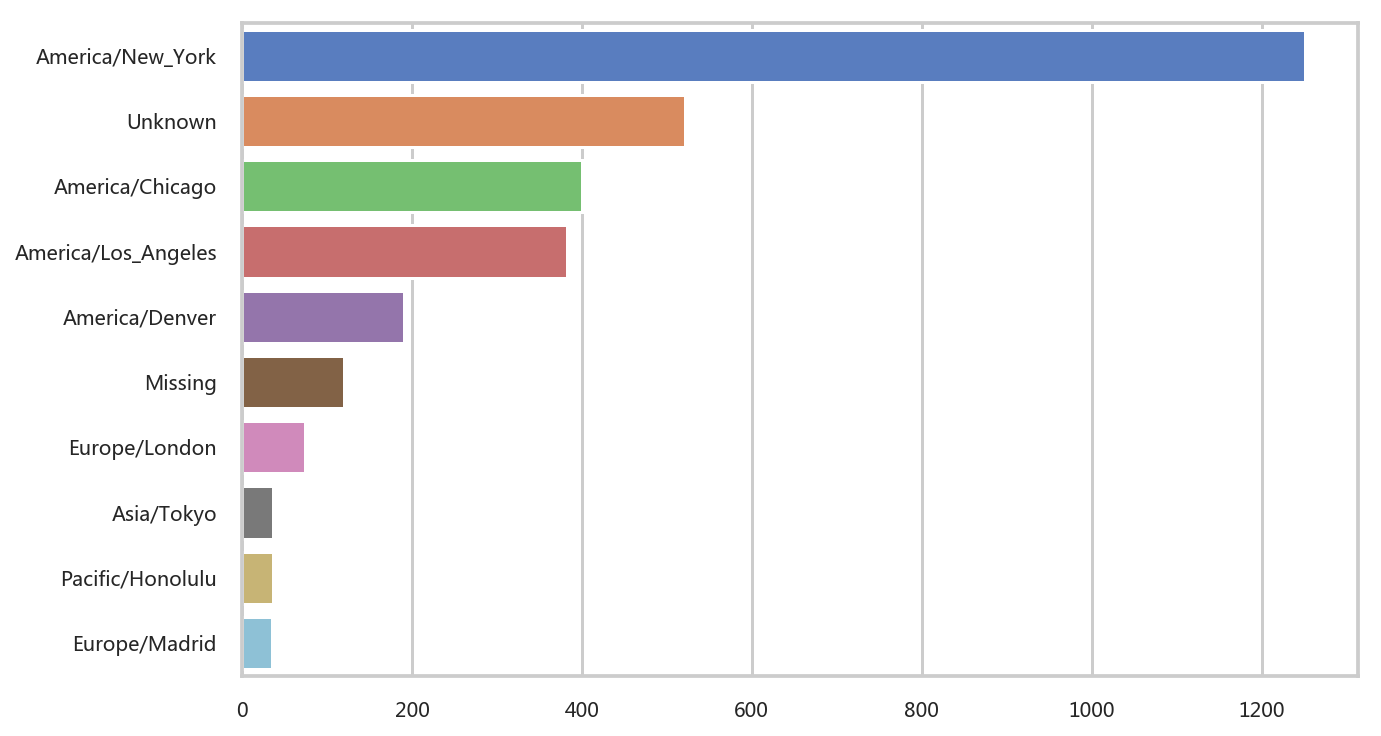

In [13]:
# 图形绘制
sns.set_context("talk", font_scale=0.6)
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values);

In [14]:
# 其他字段的数据
frame['a'][1]
frame['a'][51]
frame['a'][51][:50] # 长字符串的截取

'GoogleMaps/RochesterNY'

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [15]:
# 数据截取处理
results = pd.Series([x.split()[0] for x in frame.a.dropna()])  # 空格分列 取第一个数值
results[:5]
results.value_counts()[:8]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [16]:
cframe = frame[frame.a.notnull()] # 首先排除缺失值
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows') # 注意np.where函数 类似于if函数
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [17]:
# 根据上述的结果进行分组统计
by_tz_os = cframe.groupby(['tz', 'os'])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

# 选取最常出现的时区
indexer = agg_counts.sum(1).argsort()  # sum(axis=1) 按行统计
indexer[:10]


os,Not Windows,Windows
tz,,
,245.0000,276.0000
Africa/Cairo,0.0000,3.0000
Africa/Casablanca,0.0000,1.0000
Africa/Ceuta,0.0000,2.0000
Africa/Johannesburg,0.0000,1.0000
Africa/Lusaka,0.0000,1.0000
America/Anchorage,4.0000,1.0000
America/Argentina/Buenos_Aires,1.0000,0.0000
America/Argentina/Cordoba,0.0000,1.0000


tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [18]:
# 通过take按照这个顺序截取了最后10行最大值
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0000,20.0000
Europe/Madrid,16.0000,19.0000
Pacific/Honolulu,0.0000,36.0000
Asia/Tokyo,2.0000,35.0000
Europe/London,43.0000,31.0000
America/Denver,132.0000,59.0000
America/Los_Angeles,130.0000,252.0000
America/Chicago,115.0000,285.0000
,245.0000,276.0000


In [19]:
# 使用pandas的内置函数nlargest 完成同样的功能
agg_counts.sum(1).nlargest(10)

tz
America/New_York      1251.0000
                       521.0000
America/Chicago        400.0000
America/Los_Angeles    382.0000
America/Denver         191.0000
Europe/London           74.0000
Asia/Tokyo              37.0000
Pacific/Honolulu        36.0000
Europe/Madrid           35.0000
America/Sao_Paulo       33.0000
dtype: float64

In [20]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York      1251.0000
                       521.0000
America/Chicago        400.0000
America/Los_Angeles    382.0000
America/Denver         191.0000
Europe/London           74.0000
Asia/Tokyo              37.0000
Pacific/Honolulu        36.0000
Europe/Madrid           35.0000
America/Sao_Paulo       33.0000
dtype: float64

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0000
1,America/Sao_Paulo,Windows,20.0000
2,Europe/Madrid,Not Windows,16.0000
3,Europe/Madrid,Windows,19.0000
4,Pacific/Honolulu,Not Windows,0.0000
5,Pacific/Honolulu,Windows,36.0000
6,Asia/Tokyo,Not Windows,2.0000
7,Asia/Tokyo,Windows,35.0000
8,Europe/London,Not Windows,43.0000
9,Europe/London,Windows,31.0000


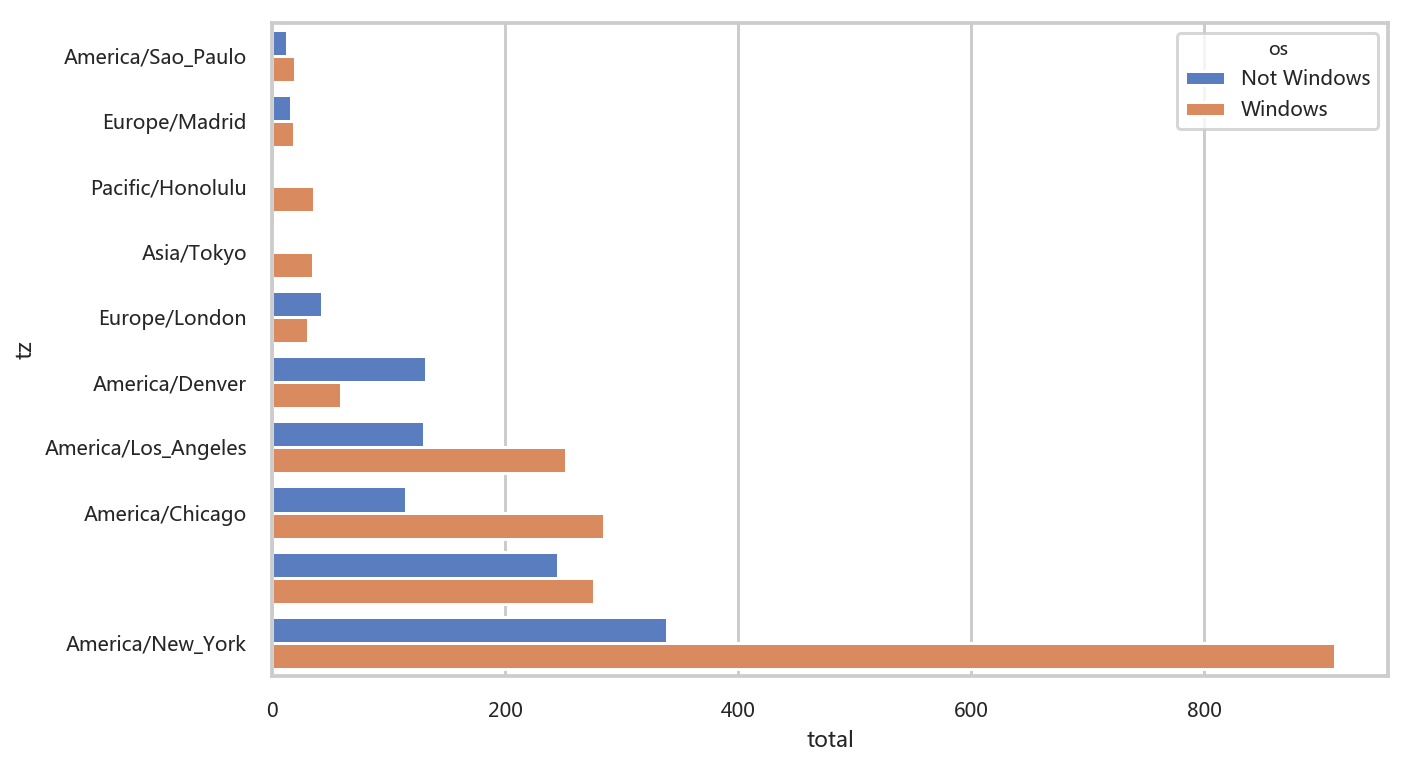

In [21]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

sns.barplot(x='total', y='tz', hue='os', data=count_subset)

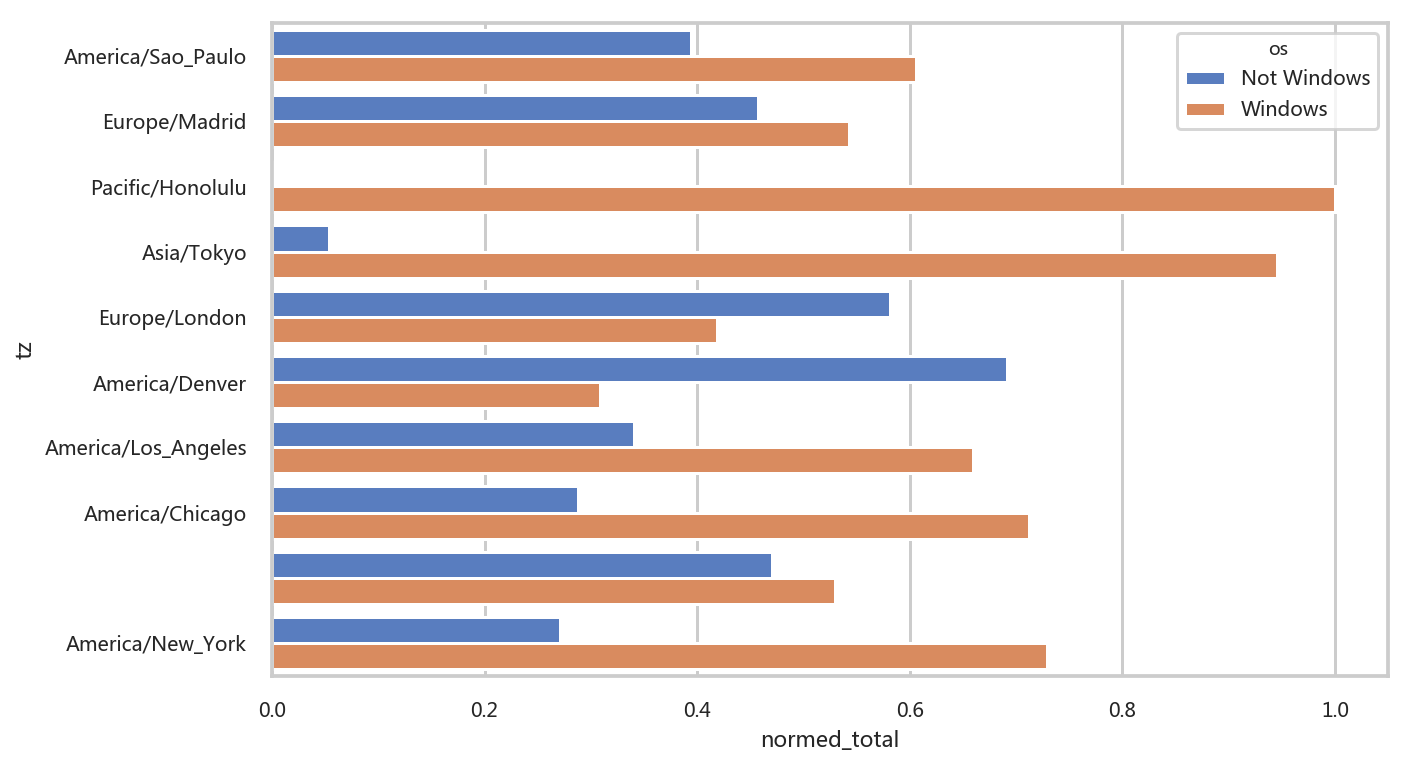

In [22]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)
sns.set_context("talk", font_scale=0.6)
sns.barplot(x='normed_total', y='tz', hue='os',data=results);

In [23]:
# 使用transform函数进行计算
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')
results2

0    0.3939
1    0.6061
2    0.4571
3    0.5429
4    0.0000
5    1.0000
6    0.0541
7    0.9459
8    0.5811
9    0.4189
10   0.6911
11   0.3089
12   0.3403
13   0.6597
14   0.2875
15   0.7125
16   0.4702
17   0.5298
18   0.2710
19   0.7290
Name: total, dtype: float64

## 2 Movielens 影评数据

In [24]:
pd.options.display.max_rows = 10 # 只显示10行数据

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',header=None, names=unames) # names指定列名 前提是header=None

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',header=None, names=mnames)

users.head()
ratings.head()
movies.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
# df合并
data = pd.merge(pd.merge(ratings, users), movies)
data.iloc[0]

# 按性别分别计算每部电影的平均得分
mean_ratings = data.pivot_table('rating', index='title',columns='gender', aggfunc='mean')
mean_ratings[:5]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.3750,2.7619
'Night Mother (1986),3.3889,3.3529
'Til There Was You (1997),2.6757,2.7333
"'burbs, The (1989)",2.7935,2.9621
...And Justice for All (1979),3.8286,3.6890


In [26]:
# 过滤评分数据不够250
ratings_by_title = data.groupby('title').size() # 给出各个分组大小的seriess对象
ratings_by_title[:10]

active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [27]:
# 根据上述结果进行数据筛选
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.7935,2.9621
10 Things I Hate About You (1999),3.6466,3.3120
101 Dalmatians (1961),3.7914,3.5000
101 Dalmatians (1996),3.2400,2.9112
12 Angry Men (1957),4.1844,4.3284


In [28]:
# 排序
top_female_ratings = mean_ratings.sort_values(by='F',ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.6444,4.4738
"Wrong Trousers, The (1993)",4.5882,4.4783
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.5726,4.4646
Wallace & Gromit: The Best of Aardman Animation (1996),4.5631,4.3851
Schindler's List (1993),4.5626,4.4914
"Shawshank Redemption, The (1994)",4.5391,4.5606
"Grand Day Out, A (1992)",4.5379,4.2933
To Kill a Mockingbird (1962),4.5367,4.3726
Creature Comforts (1990),4.5139,4.2723


### 2.1  计算评分分歧

In [29]:
# 男女评分差异
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [30]:
# 分歧最大且女性观众更喜欢的电影
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.7904,2.9596,-0.8308
Jumpin' Jack Flash (1986),3.2547,2.5784,-0.6764
Grease (1978),3.9753,3.3670,-0.6082
Little Women (1994),3.8706,3.3217,-0.5488
Steel Magnolias (1989),3.9017,3.3660,-0.5358
Anastasia (1997),3.8000,3.2816,-0.5184
"Rocky Horror Picture Show, The (1975)",3.6730,3.1601,-0.5129
"Color Purple, The (1985)",4.1582,3.6593,-0.4989
"Age of Innocence, The (1993)",3.8271,3.3395,-0.4876


In [31]:
# 对排序结果反序并取出前10行，得到的则是男性观众更喜欢的电影
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.4949,4.2213,0.7264
"Kentucky Fried Movie, The (1977)",2.8788,3.5551,0.6764
Dumb & Dumber (1994),2.6980,3.3366,0.6386
"Longest Day, The (1962)",3.4118,4.0314,0.6197
"Cable Guy, The (1996)",2.2500,2.8638,0.6138
Evil Dead II (Dead By Dawn) (1987),3.2973,3.9093,0.6120
"Hidden, The (1987)",3.1379,3.7451,0.6072
Rocky III (1982),2.3617,2.9435,0.5818
Caddyshack (1980),3.3961,3.9697,0.5736


In [32]:
# 找出分歧最大的电影（不考虑性别因素），则可以计算得分数据的方差或标准差
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                    1.3213
Blair Witch Project, The (1999)         1.3164
Natural Born Killers (1994)             1.3072
Tank Girl (1995)                        1.2777
Rocky Horror Picture Show, The (1975)   1.2602
Eyes Wide Shut (1999)                   1.2596
Evita (1996)                            1.2536
Billy Madison (1995)                    1.2500
Fear and Loathing in Las Vegas (1998)   1.2464
Bicentennial Man (1999)                 1.2455
Name: rating, dtype: float64

## 3 1880-2010年间全美婴儿姓名

In [33]:
!head -n 10 datasets/babynames/yob1880.txt 

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [34]:
# 读取单个文件数据
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [35]:
# 性别比例
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [36]:
# 批量读取多个同样格式的文件；书中的方法是获取文件名称（有规律），也可使用os.listdir(path)直接获取指定目录的文件名称

years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year # 添加年份数据
    pieces.append(frame)

# 多个df上下合并为一个
names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


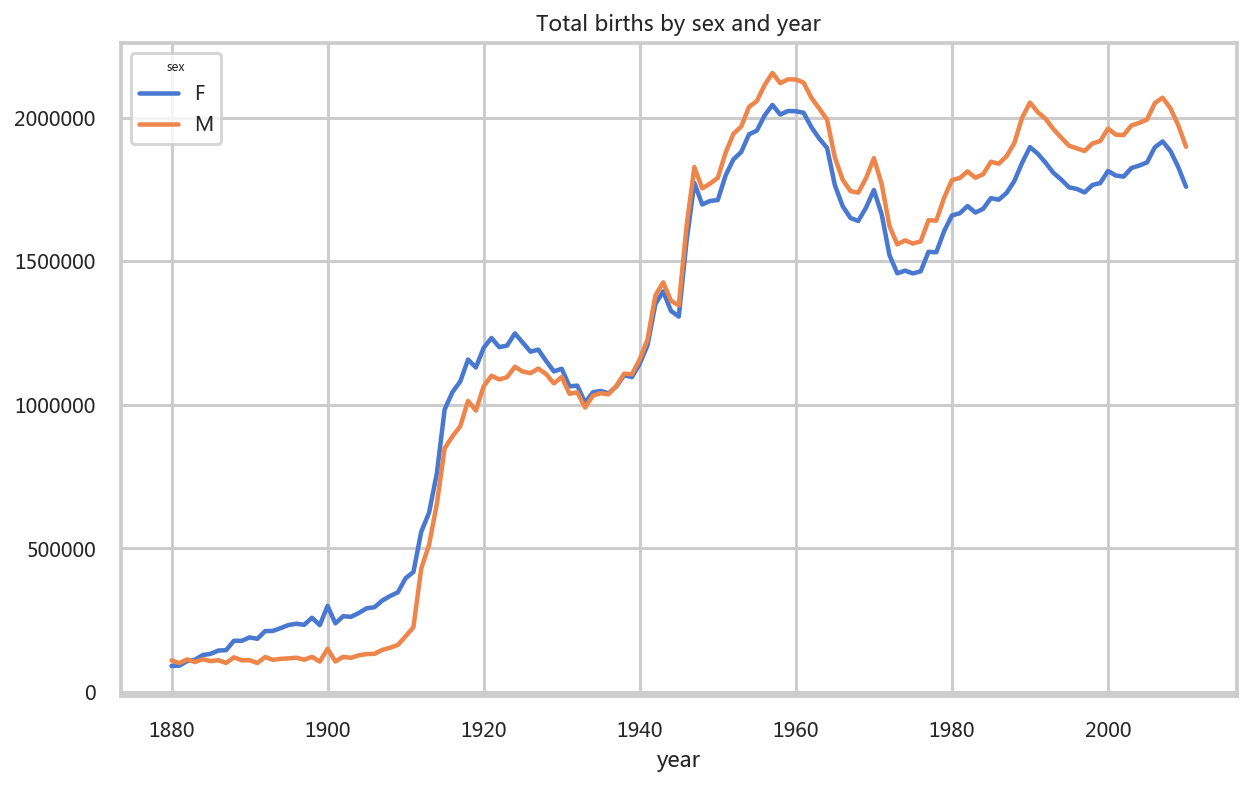

In [37]:
plt.rcParams['font.size'] = 6
# 对数据进行数据透视
total_births = names.pivot_table('births', index='year',columns='sex', aggfunc=sum)
total_births.tail()

total_births.plot(title='Total births by sex and year');

In [38]:
# 自定义分组函数，存放指定名字的婴儿数相对于当年该性别总出生数的比例
def add_prop(group):  # 借鉴这种写法 以group的内容为参数，没必要再去单独计算分组后的sum然后做除法
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.0776
1,Anna,F,2604,1880,0.0286
2,Emma,F,2003,1880,0.0220
3,Elizabeth,F,1939,1880,0.0213
4,Minnie,F,1746,1880,0.0192


In [39]:
# 有效性检查
names.groupby(['year', 'sex']).prop.sum() 

year  sex
1880  F     1.0000
      M     1.0000
1881  F     1.0000
      M     1.0000
1882  F     1.0000
             ...  
2008  M     1.0000
2009  F     1.0000
      M     1.0000
2010  F     1.0000
      M     1.0000
Name: prop, Length: 262, dtype: float64

In [40]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

top1000.reset_index(inplace=True, drop=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.0776
1,Anna,F,2604,1880,0.0286
2,Emma,F,2003,1880,0.0220
3,Elizabeth,F,1939,1880,0.0213
4,Minnie,F,1746,1880,0.0192


### 3.1 分析命名趋势

In [41]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [42]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


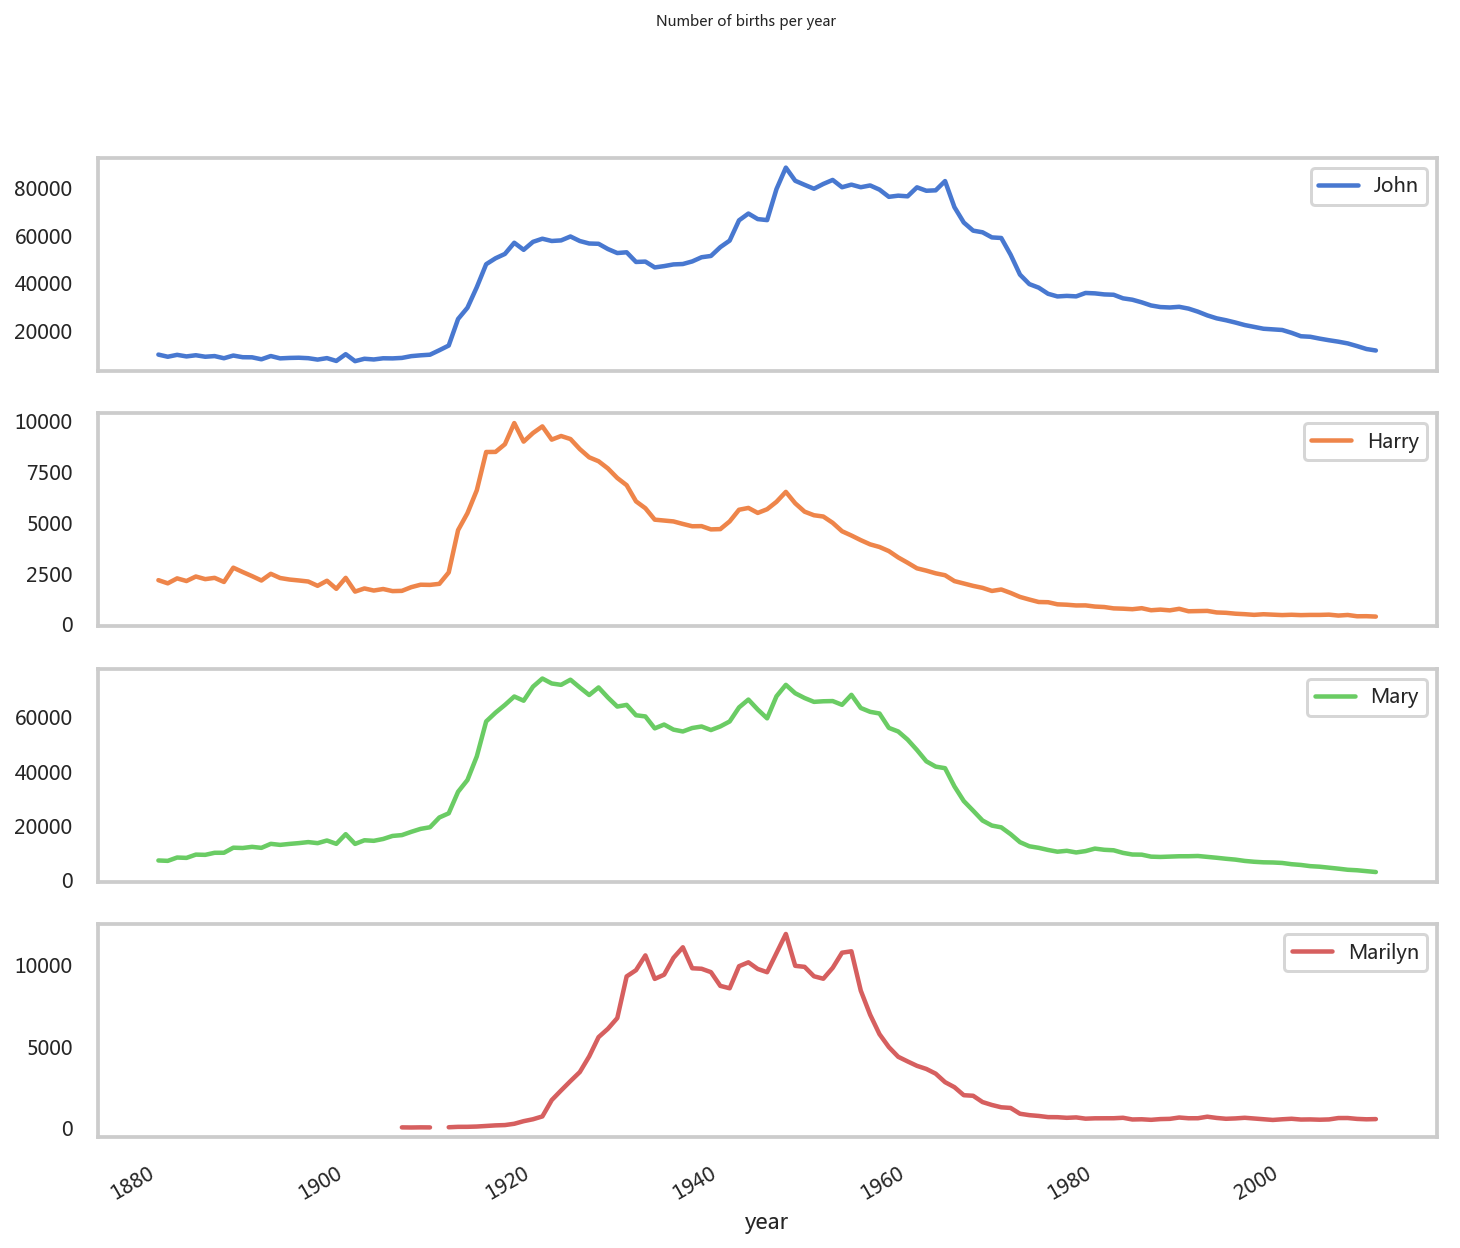

In [43]:
plt.rcParams['font.size'] = 6
total_births.info()
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year");

### 3.2 评估命名多样性的增长

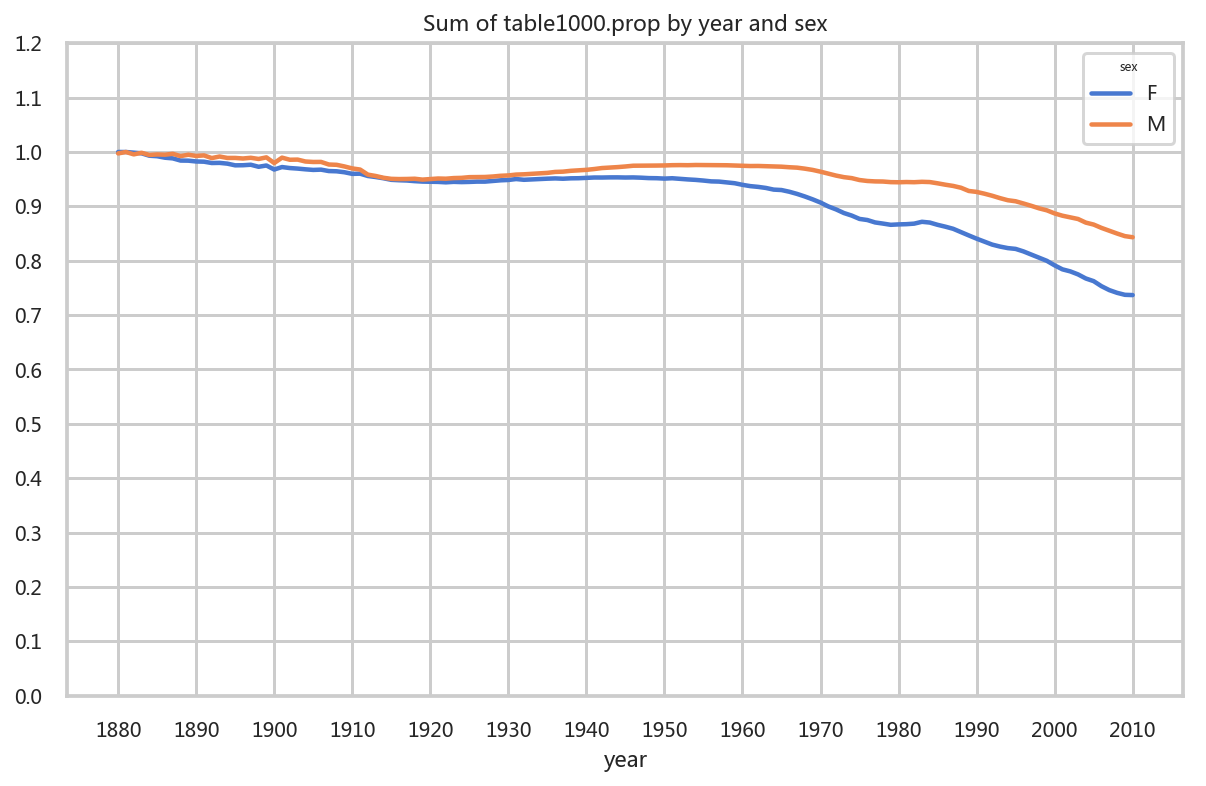

In [44]:
plt.rcParams['font.size'] = 6
table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)

table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10));

In [45]:
df = boys[boys.year == 2010]
df.head()

prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5)

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.0115
260878,Ethan,M,17866,2010,0.0094
260879,Michael,M,17133,2010,0.0090
260880,Jayden,M,17030,2010,0.0090
260881,William,M,16870,2010,0.0089


260877   0.0115
260878   0.0209
260879   0.0300
260880   0.0389
260881   0.0478
260882   0.0566
260883   0.0652
260884   0.0734
260885   0.0815
260886   0.0896
Name: prop, dtype: float64

116

In [46]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [47]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Figure size 720x432 with 0 Axes>

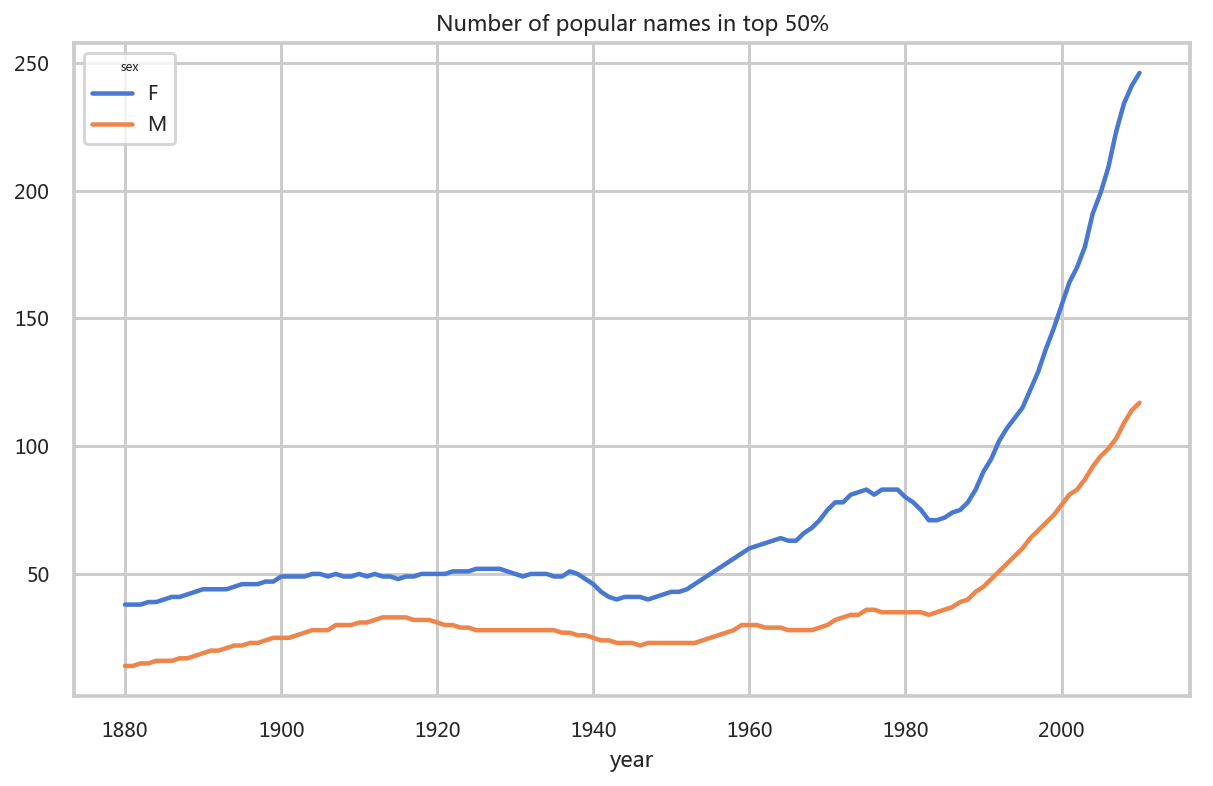

In [48]:
fig = plt.figure()
diversity.plot(title="Number of popular names in top 50%")

### 3.3 最后一个字母的变动

In [49]:
# 从名字列提取最后一个字母
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,columns=['sex', 'year'], aggfunc=sum)

In [50]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                   F                                  M              \
year               1910        1960        2010       1910        1960   
last_letter                                                              
a           108376.0000 691247.0000 670605.0000   977.0000   5204.0000   
b                   nan    694.0000    450.0000   411.0000   3912.0000   
c                5.0000     49.0000    946.0000   482.0000  15476.0000   
d             6750.0000   3729.0000   2607.0000 22111.0000 262112.0000   
e           133569.0000 435013.0000 313833.0000 28655.0000 178823.0000   

sex                      
year               2010  
last_letter              
a            28438.0000  
b            38859.0000  
c            23125.0000  
d            44398.0000  
e           129012.0000

In [51]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

sex  year
F    1910    396416.0000
     1960   2022062.0000
     2010   1759010.0000
M    1910    194198.0000
     1960   2132588.0000
     2010   1898382.0000
dtype: float64

sex              F                    M              
year          1910   1960   2010   1910   1960   2010
last_letter                                          
a           0.2734 0.3419 0.3812 0.0050 0.0024 0.0150
b              nan 0.0003 0.0003 0.0021 0.0018 0.0205
c           0.0000 0.0000 0.0005 0.0025 0.0073 0.0122
d           0.0170 0.0018 0.0015 0.1139 0.1229 0.0234
e           0.3369 0.2151 0.1784 0.1476 0.0839 0.0680
...            ...    ...    ...    ...    ...    ...
v              nan 0.0001 0.0001 0.0001 0.0000 0.0014
w           0.0000 0.0000 0.0012 0.0063 0.0077 0.0161
x           0.0000 0.0000 0.0007 0.0040 0.0019 0.0086
y           0.1110 0.1526 0.1168 0.0773 0.1610 0.0582
z           0.0024 0.0007 0.0007 0.0002 0.0002 0.0018

[26 rows x 6 columns]

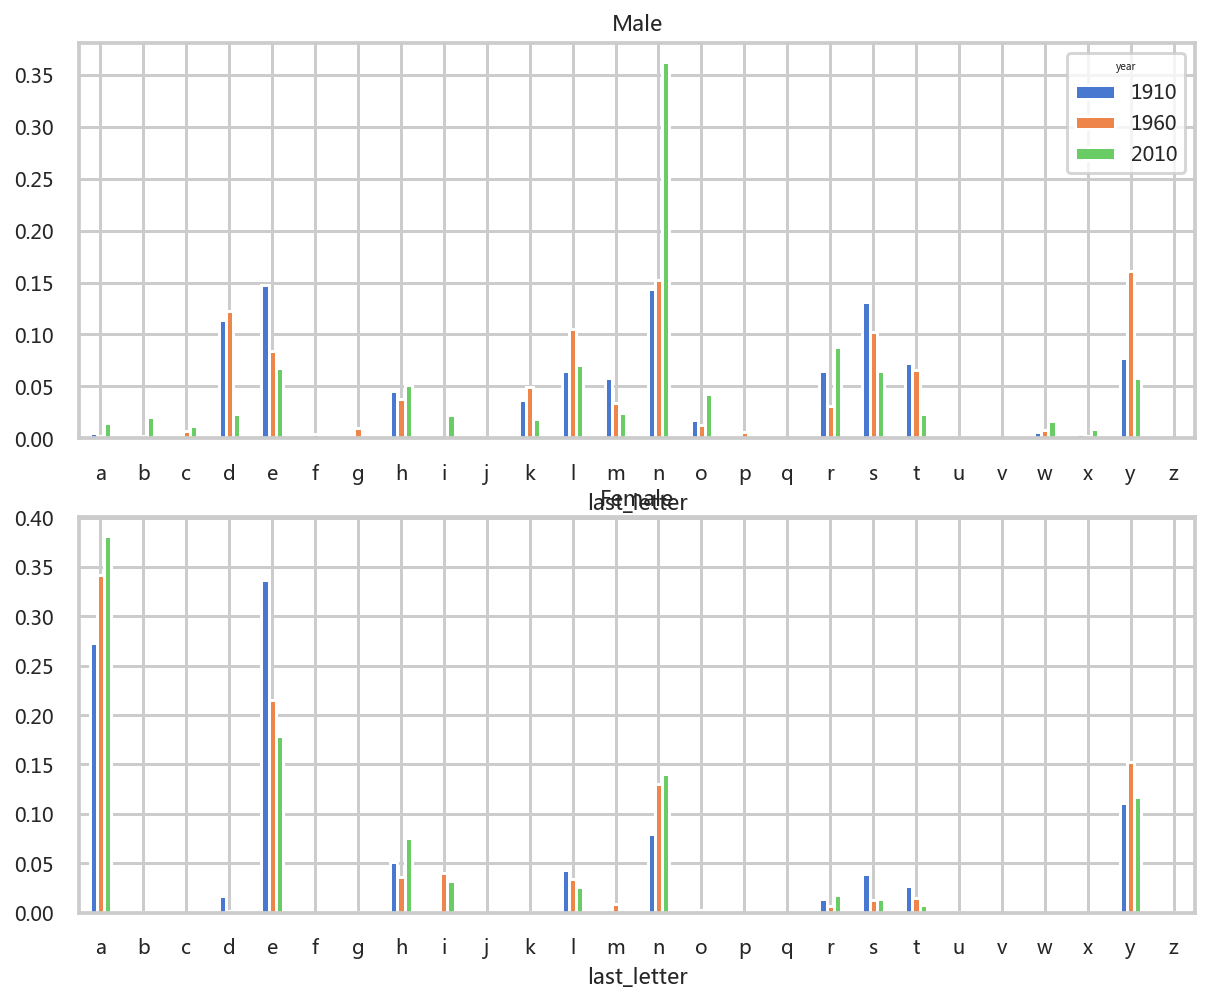

In [52]:
plt.rcParams['font.size'] = 5
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False);

In [53]:
plt.subplots_adjust(hspace=0.25)

<Figure size 720x432 with 0 Axes>

In [54]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.0831,0.1532,0.0758
1881,0.0832,0.1532,0.0775
1882,0.0853,0.1496,0.0775
1883,0.0841,0.1516,0.0791
1884,0.0861,0.1499,0.0804


<Figure size 720x432 with 0 Axes>

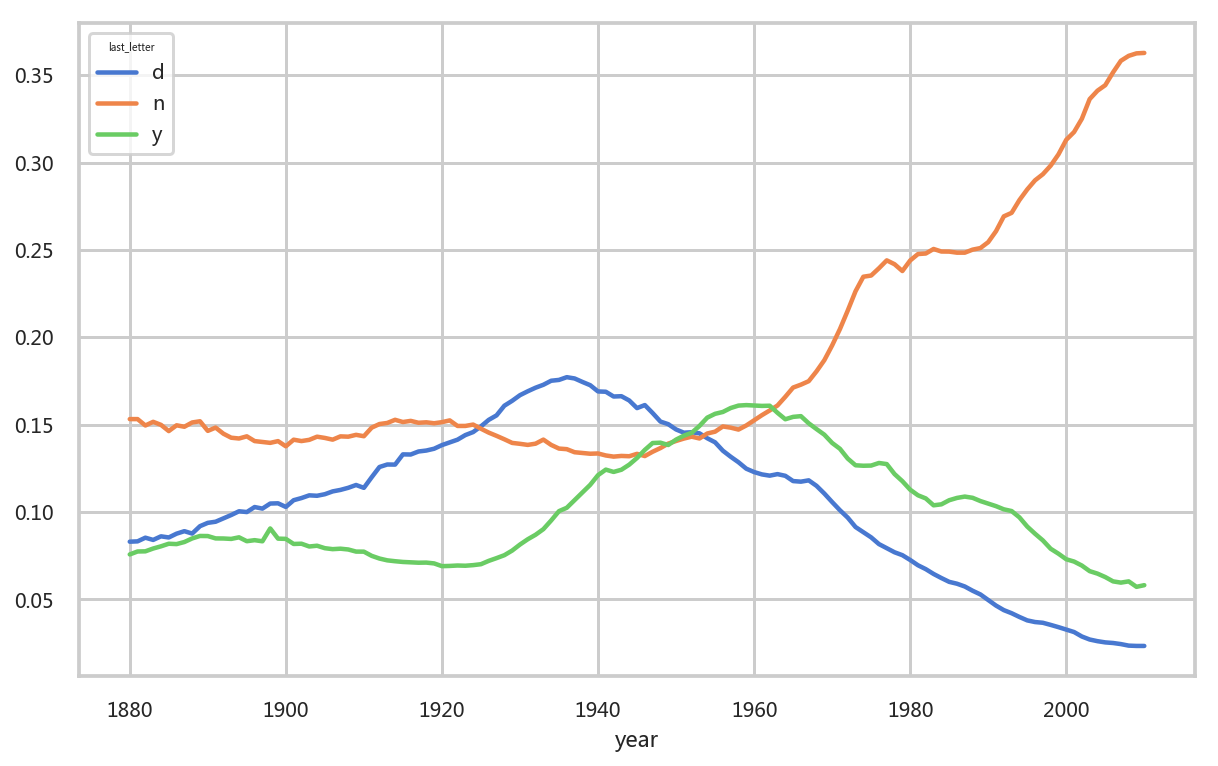

In [55]:
plt.close('all')
fig = plt.figure()
dny_ts.plot()

### 3.4 变成女孩名字的男孩名字（以及相反的情况）

In [56]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [57]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [58]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0000,nan
2007,1.0000,nan
2008,1.0000,nan
2009,1.0000,nan
2010,1.0000,nan


<Figure size 720x432 with 0 Axes>

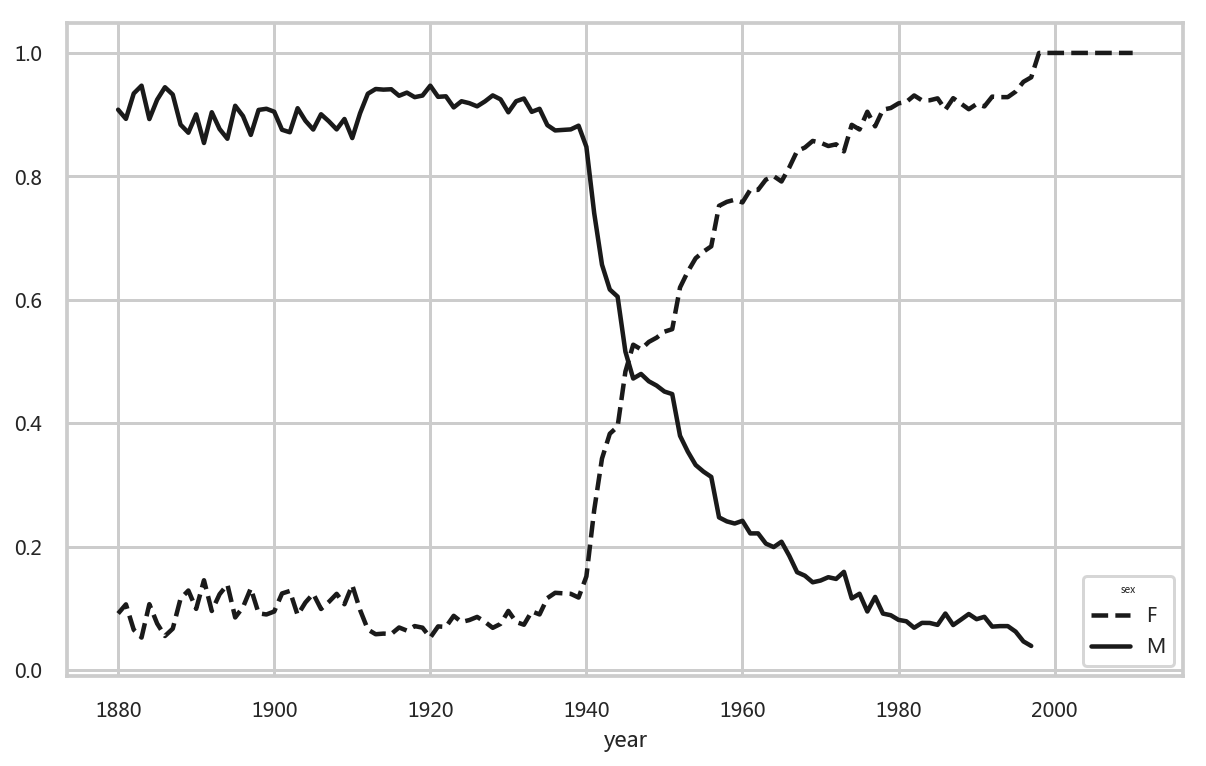

In [59]:
fig = plt.figure()
table.plot(style={'M': 'k-', 'F': 'k--'})

## 4 USDA食品数据库

In [60]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

In [61]:
db[0].keys()
db[0]['nutrients'][0]
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

,description,group,units,value
0,Protein,Composition,g,25.1800
1,Total lipid (fat),Composition,g,29.2000
2,"Carbohydrate, by difference",Composition,g,3.0600
3,Ash,Other,g,3.2800
4,Energy,Energy,kcal,376.0000
5,Water,Composition,g,39.2800
6,Energy,Energy,kJ,1573.0000


In [62]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]
info.info()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [63]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [64]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.1800,1008
1,Total lipid (fat),Composition,g,29.2000,1008
2,"Carbohydrate, by difference",Composition,g,3.0600,1008
3,Ash,Other,g,3.2800,1008
4,Energy,Energy,kcal,376.0000,1008


In [65]:
nutrients.duplicated().sum()
nutrients = nutrients.drop_duplicates()

14179

In [66]:
col_mapping = {'description' : 'food',
          'group': 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()

col_mapping = {'description' : 'nutrient',
          'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.1800,1008
1,Total lipid (fat),Composition,g,29.2000,1008
2,"Carbohydrate, by difference",Composition,g,3.0600,1008
3,Ash,Other,g,3.2800,1008
4,Energy,Energy,kcal,376.0000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.0000,43546
389351,Cholesterol,Other,mg,0.0000,43546
389352,"Fatty acids, total saturated",Other,g,0.0720,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.0280,43546


In [67]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()
ndata.iloc[30000]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                           0.0400
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

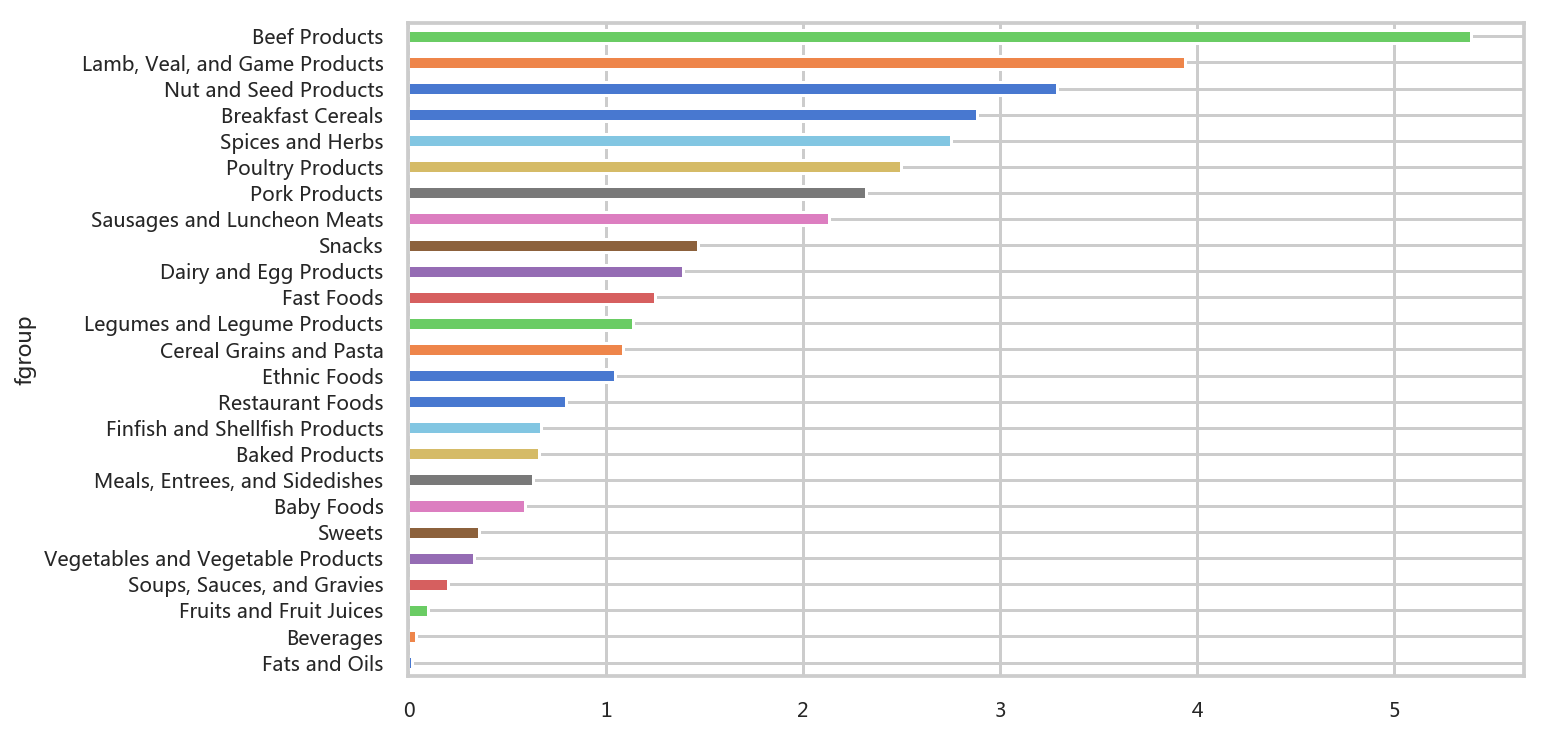

In [68]:
fig = plt.figure()

result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [69]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

## 5 2012联邦选举委员会数据库

In [72]:
fec = pd.read_csv('./datasets/fec/PALL.csv')
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [73]:
fec.iloc[123456]

unique_cands = fec.cand_nm.unique()
unique_cands
unique_cands[2]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

'Obama, Barack'

In [74]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [75]:
fec.cand_nm[123456:123461]
fec.cand_nm[123456:123461].map(parties)

# 添加列 
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [76]:
(fec.contb_receipt_amt > 0).value_counts()

fec = fec[fec.contb_receipt_amt > 0]
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

### 5.1 根据职业和雇主统计赞助信息

In [77]:
fec.contbr_occupation.value_counts()[:10]

occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# 如果没有匹配值 则返回x  
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}


f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.9700,7477194.4300
CEO,2074974.7900,4211040.5200
CONSULTANT,2459912.7100,2544725.4500
ENGINEER,951525.5500,1818373.7000
EXECUTIVE,1355161.0500,4138850.0900
...,...,...
PRESIDENT,1878509.9500,4720923.7600
PROFESSOR,2165071.0800,296702.7300
REAL ESTATE,528902.0900,1625902.2500


<Figure size 720x432 with 0 Axes>

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                 25305116.3800
               ATTORNEY                11141982.9700
               INFORMATION REQUESTED    4866973.9600
               HOMEMAKER                4248875.8000
               PHYSICIAN                3735124.9400
                                            ...     
Romney, Mitt   HOMEMAKER                8147446.2200
               ATTORNEY                 5364718.8200
               PRESIDENT                2491244.8900
               EXECUTIVE                2300947.0300
               C.E.O.                   1968386.1100
Name: contb_receipt_amt, Length: 14, dtype: float64

cand_nm        contbr_employer      
Obama, Barack  RETIRED                 22694358.8500
               SELF-EMPLOYED           17080985.9600
               NOT EMPLOYED             8586308.7000
               INFORMATION REQUESTED    5053480.3700
               HOMEMAKER                2605408.5400
                                            ...     
Romney, Mitt   CREDIT SUISSE             281150.0000
               MORGAN STANLEY            267266.0000
               GOLDMAN SACH & CO.        238250.0000
               BARCLAYS CAPITAL          162750.0000
               H.I.G. CAPITAL            139500.0000
Name: contb_receipt_amt, Length: 20, dtype: float64

<Figure size 720x432 with 0 Axes>

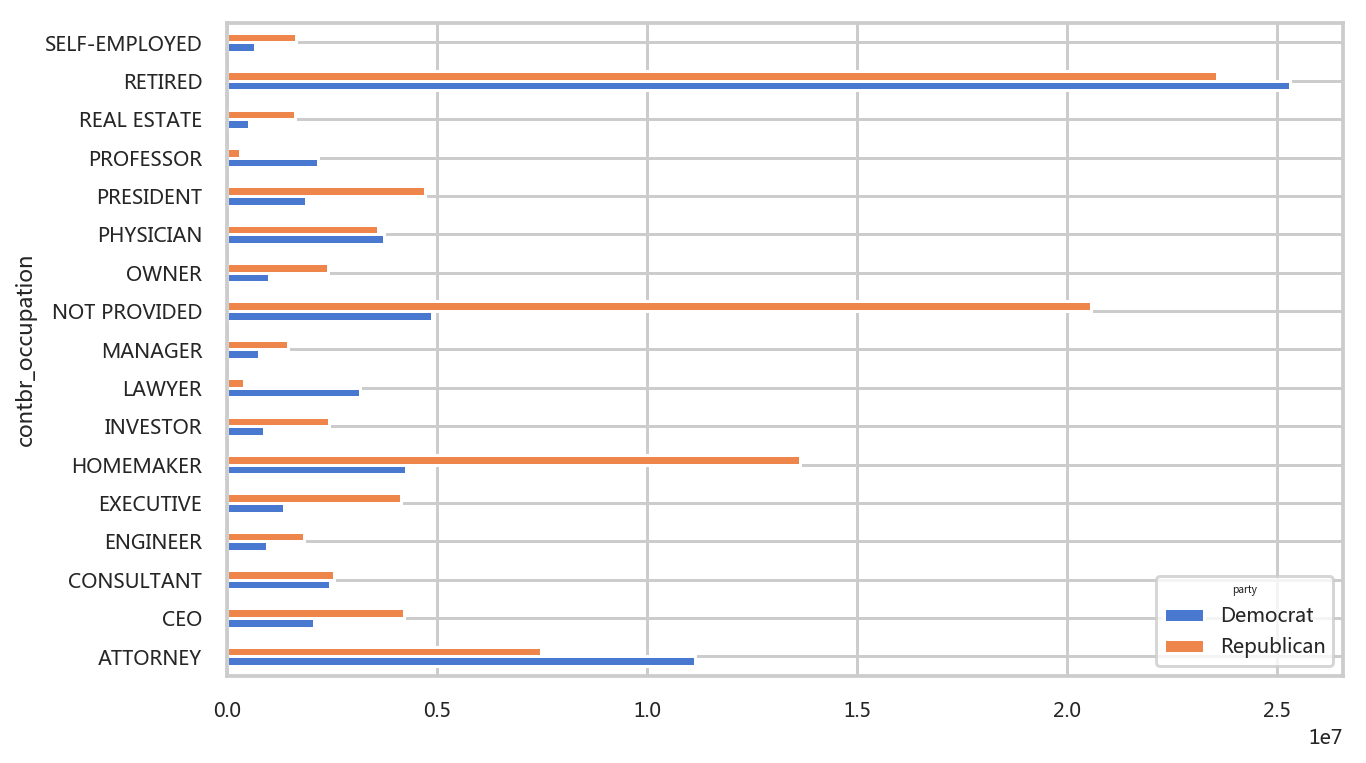

In [78]:
plt.figure()

over_2mm.plot(kind='barh')

def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

### 5.2 对出资额分组

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0000,77.0000
"(1, 10]",40070.0000,3681.0000
"(10, 100]",372280.0000,31853.0000
"(100, 1000]",153991.0000,43357.0000
"(1000, 10000]",22284.0000,26186.0000
"(10000, 100000]",2.0000,1.0000
"(100000, 1000000]",3.0000,nan
"(1000000, 10000000]",4.0000,nan


<Figure size 720x432 with 0 Axes>

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.8052,0.1948
"(1, 10]",0.9188,0.0812
"(10, 100]",0.9108,0.0892
"(100, 1000]",0.7102,0.2898
"(1000, 10000]",0.4473,0.5527
"(10000, 100000]",0.8231,0.1769
"(100000, 1000000]",1.0000,nan
"(1000000, 10000000]",1.0000,nan


<Figure size 720x432 with 0 Axes>

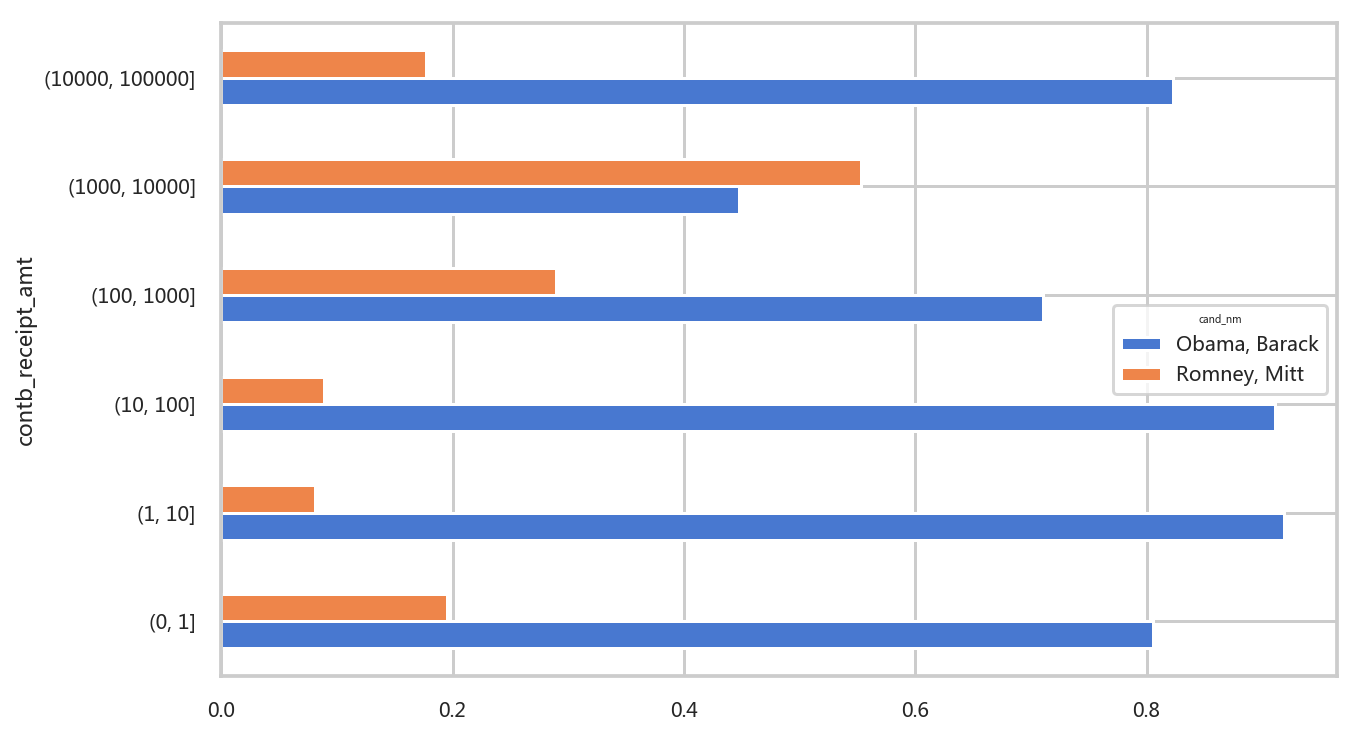

In [79]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

plt.figure()

bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums
normed_sums[:-2].plot(kind='barh')

### 5.3 根据州统计赞助信息

In [80]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.1500,86204.2400
AL,543123.4800,527303.5100
AR,359247.2800,105556.0000
AZ,1506476.9800,1888436.2300
CA,23824984.2400,11237636.6000
CO,2132429.4900,1506714.1200
CT,2068291.2600,3499475.4500
DC,4373538.8000,1025137.5000
DE,336669.1400,82712.0000


In [81]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.7658,0.2342
AL,0.5074,0.4926
AR,0.7729,0.2271
AZ,0.4437,0.5563
CA,0.6795,0.3205
CO,0.5860,0.4140
CT,0.3715,0.6285
DC,0.8101,0.1899
DE,0.8028,0.1972
